In [1]:
import scanpy as sc
from RADO import DoubletDetection

/home/cys/miniconda3/envs/RADO_env/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
adata = sc.datasets.pbmc3k()

In [3]:
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

## RADO takes count matrix as input

In [4]:
adata = DoubletDetection(adata)

Simulating doublets...
Done!
Computing KNN doublet score...
Done!
(2700, 32738) (2160, 32738)
Normalizing library size...
Done!
Doing log transformation...
Done!
Doing PCA...
Done!
Training and predicting...


100%|█████████████████████████████████████████████| 5/5 [02:55<00:00, 35.19s/it]

Done!


## Output model predicted doublets

In [5]:
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'RADO_KNN_doublet_score', 'RADO_KNN_doublet_call', 'RADO_doublet_score', 'RADO_doublet_call'
    var: 'gene_ids'

In [ ]:
# To filter out doublets
# adata = adata[adata.obs['RADO_doublet_call']==0,]

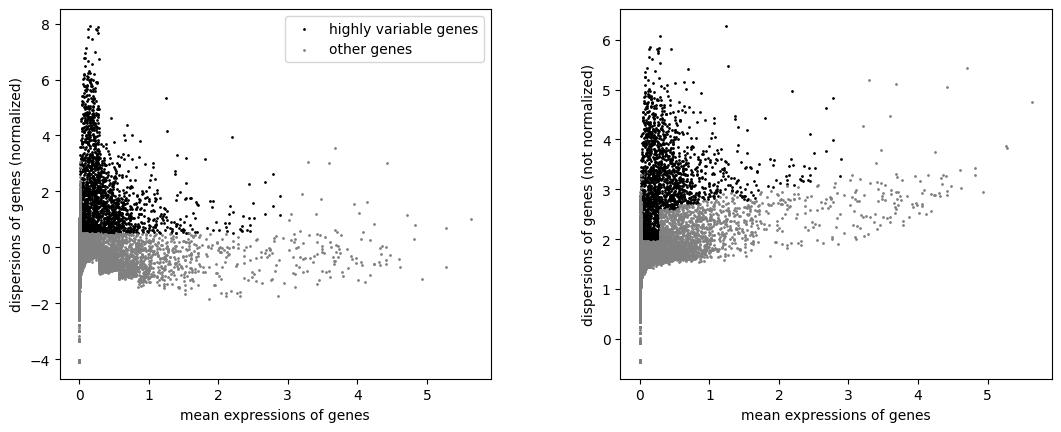

In [6]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)
adata = adata[:, adata.var.highly_variable]
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver="arpack")
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

In [7]:
adata

AnnData object with n_obs × n_vars = 2700 × 2078
    obs: 'RADO_KNN_doublet_score', 'RADO_KNN_doublet_call', 'RADO_doublet_score', 'RADO_doublet_call'
    var: 'gene_ids', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

## Visualize the prediciton

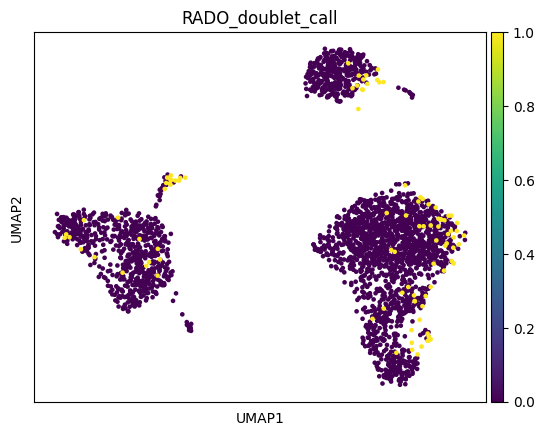

In [8]:
sc.pl.umap(adata,color='RADO_doublet_call')